# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [67]:
# Your code here. 
import pandas as pd
import numpy as np
import seaborn as sns # plotting library
sns.set(style='white') # seaborn style

from sklearn.linear_model import LogisticRegression # logistic regression model   
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler # standarized
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split as tts

import statsmodels.formula.api as smf # regression modeling

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [11]:
student_data = pd.DataFrame({'StudentID': [1,2,3,4,5,6,7,8,9,10], 'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies':[10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

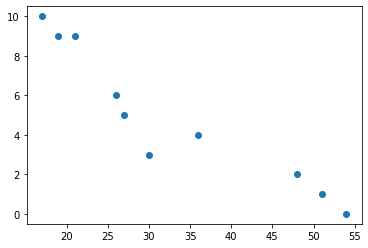

In [12]:
# Your code here.
plt.scatter(student_data['Age'], student_data['Tardies'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
# Inversely proportional

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

Text(0, 0.5, 'Tardies')

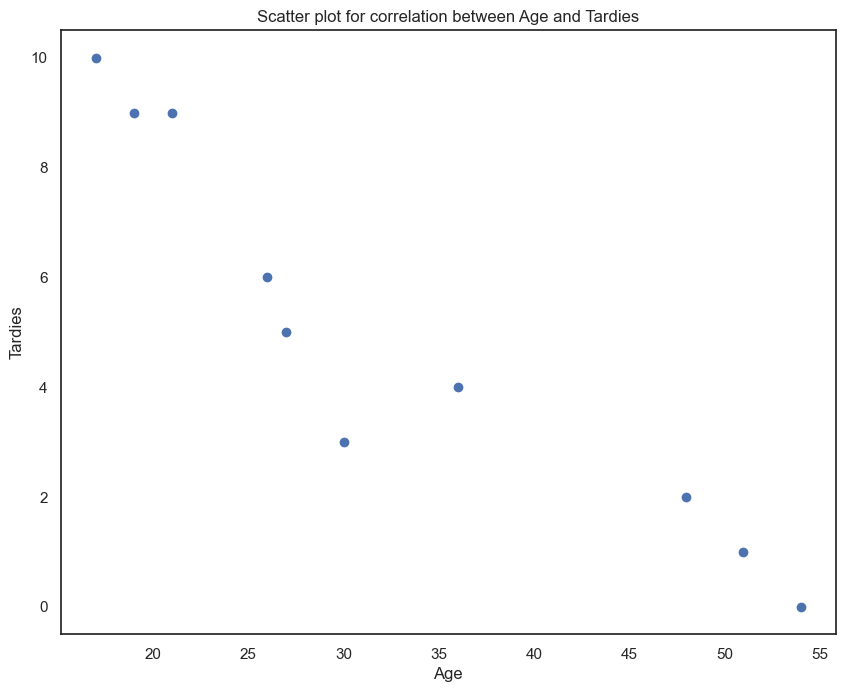

In [17]:
# Your response here.
plt.scatter(student_data.Age, student_data.Tardies)
plt.title('Scatter plot for correlation between Age and Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [37]:
# Your response here.
lr = LinearRegression()
lr.fit(X = student_data[["Age"]], y = student_data.Tardies)

LinearRegression()

Plot your regression model on your scatter plot.

coef:  -0.2428207709159809 intercept:  12.888803363135771


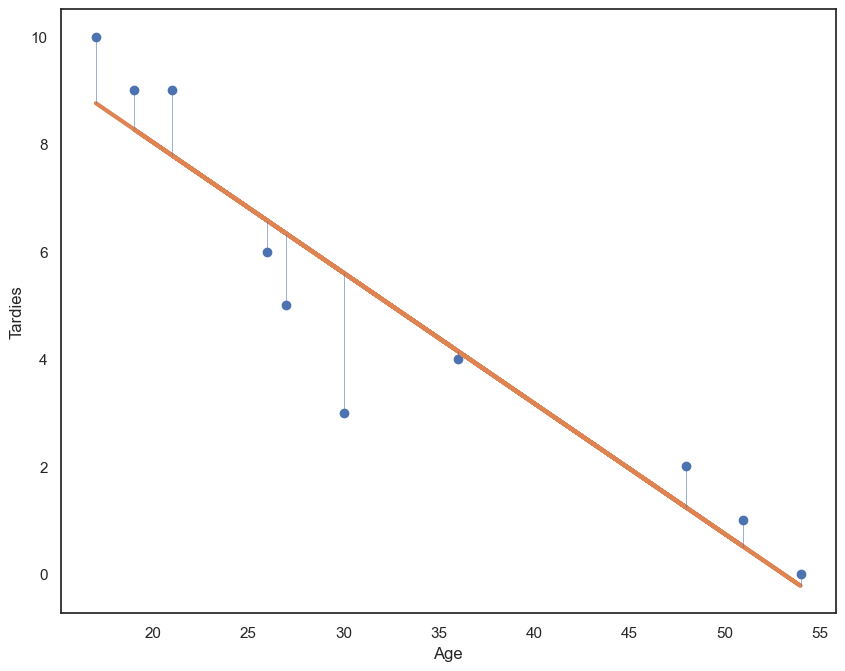

In [47]:
b1 = lr.coef_[0]
b0 = lr.intercept_
line = X*b1 + b0

plt.scatter(X,y)
plt.plot(X,line)
plt.plot(X, line, lw=3)
plt.vlines(X, line,y , lw=0.4)
plt.xlabel("Age")
plt.ylabel("Tardies")

print('coef: ', b1, 'intercept: ', b0)

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

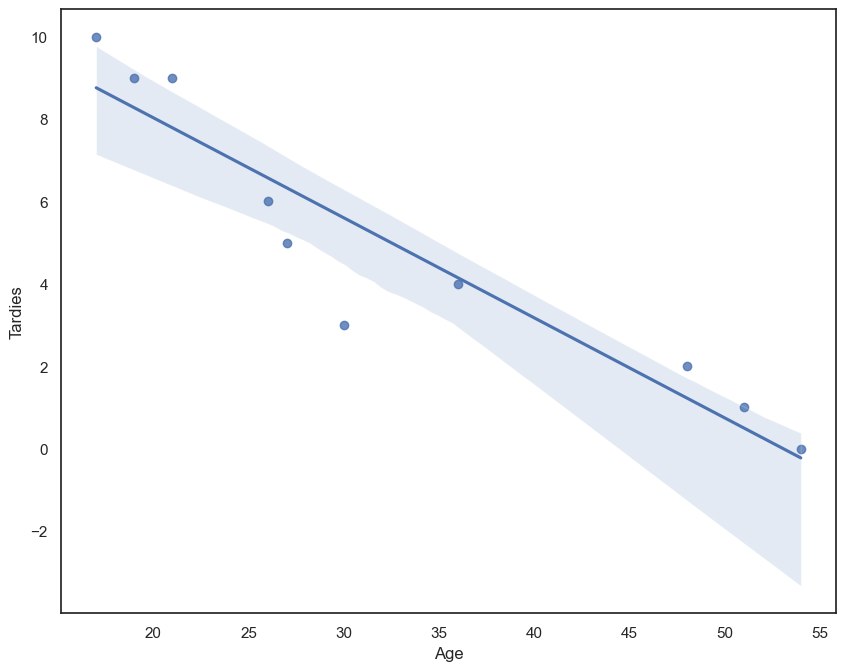

In [21]:
# Your code here.
sns.regplot(student_data.Age, student_data.Tardies)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
# Sicne the varince in the regression model closely fits our data I feel relatively confident expressing a correlation between the two. It would take a full nalaysis to tell with mor confidence.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [53]:
# Import any libraries you may need & the data
veh = pd.read_csv('vehicles.csv')
veh.sample(5)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
16961,Honda,Accord,2002,2.3,4.0,Manual 5-spd,Front-Wheel Drive,Midsize Cars,Regular,13.184400,22,29,25,355.480000,1350
13922,Ford,Ranger Pickup 2WD,2009,4.0,6.0,Manual 5-spd,Rear-Wheel Drive,Small Pickup Trucks 2WD,Regular,19.388824,15,21,17,522.764706,1950
12124,Ford,Escape FWD,2006,2.3,4.0,Automatic 4-spd,Front-Wheel Drive,Sport Utility Vehicle - 2WD,Regular,15.695714,20,23,21,423.190476,1600
31251,Subaru,Impreza Wagon/Outback SPT AWD,2008,2.5,4.0,Automatic (S4),4-Wheel or All-Wheel Drive,Small Station Wagons,Premium,14.982273,20,25,22,403.954545,1850
6041,Chevrolet,HHR FWD,2007,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Sport Utility Vehicle - 2WD,Regular,14.982273,19,28,22,403.954545,1500


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [51]:
# Your response here. 
df = veh[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'CO2 Emission Grams/Mile', 'Fuel Cost/Year']]
df.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


In [ ]:
# Emissions and Fuel Barrels/Year is the most correlated pair
# Fuel Barrels/Year and Fuel Cost/Year is close
# Least helpful is Year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

coef:  0.03700281306827472 intercept:  0.021013852496853502


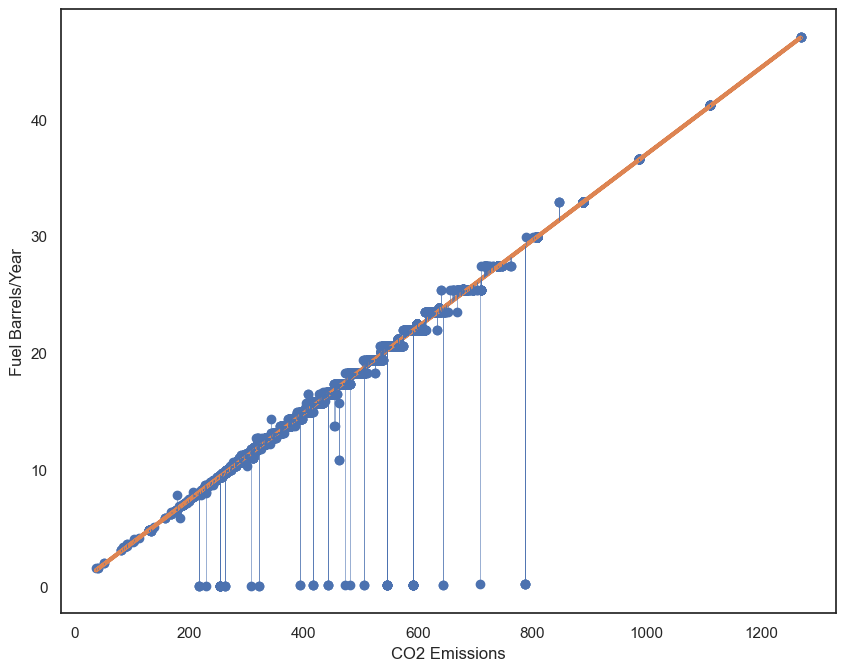

In [64]:
# Your response here. 
X = df[["CO2 Emission Grams/Mile"]]
y = df['Fuel Barrels/Year']
lr.fit(X = df[["CO2 Emission Grams/Mile"]], y = df['Fuel Barrels/Year'])
b1 = lr.coef_[0]
b0 = lr.intercept_
line = X*b1 + b0

plt.scatter(X,y)
plt.plot(X,line)
plt.plot(X, line, lw=3)
plt.vlines(X, line,y , lw=0.4)
plt.xlabel("CO2 Emissions")
plt.ylabel("Fuel Barrels/Year")

print('coef: ', b1, 'intercept: ', b0)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [76]:
# Your response here. 
x_reg = df['CO2 Emission Grams/Mile']
y1_reg = df['Fuel Cost/Year']
y2_reg = df['Year']
y3_reg = df['Cylinders']
y4_reg = df['Fuel Barrels/Year']
results = smf.ols("x_reg ~ y1_reg + y2_reg + y3_reg + y4_reg", data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  x_reg   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 4.022e+05
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:48:59   Log-Likelihood:            -1.5412e+05
No. Observations:               35952   AIC:                         3.083e+05
Df Residuals:                   35947   BIC:                         3.083e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    778.5158     20.730     37.556      0.000     737.885     819.146
y1_reg         0.0408      0.000     81.636      0.000       0.040       0.042
y2_reg        -0.3831      0.010    -37.105      0.000      -0.403      -0.363
y3_reg         2.0361      0.089     22.918      0.000       1.862       2.210
y4_reg        21.2605      0.056    376.565      0.000      21.150      21.371
==============================================================================
Omnibus:                    76663.839   Durbin-Watson:                   0.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        388760530.513
Skew:                          18.894   Prob(JB):                         0.00
Kurtosis:                     511.027   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 